In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
n_samples = 1000
batch_size = 100
num_steps = 20000

In [12]:
X_data = np.random.uniform(0, 1, (n_samples, 1))
y_data = 2 * X_data + 1 + np.random.normal(0, 0.2, (n_samples, 1))

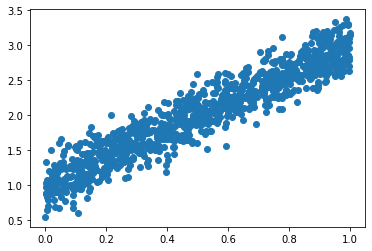

In [13]:
plt.scatter(X_data, y_data)

In [14]:
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))

In [15]:
with tf.variable_scope('linear-regression'):
    k = tf.Variable(tf.random_normal((1,1)), name='slope')
    b = tf.Variable(tf.zeros((1,)), name='bias')

In [16]:
y_pred = tf.matmul(X, k) + b
loss = tf.reduce_sum((y - y_pred) ** 2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [18]:
display_step = 100
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_steps):
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]

        _, loss_val, k_val, b_val = sess.run([optimizer, loss, k, b], feed_dict = {X: X_batch, y: y_batch})
        
        if (i+1) % display_step == 0:
            print('Epoch %d: %.8f, k=%.4f, b=%.4f' % (i+1, loss_val, k_val, b_val))

Epoch 100: 5.08267736, k=1.7050, b=1.1760
Epoch 200: 3.19425631, k=1.9026, b=1.0614
Epoch 300: 3.25853539, k=1.9563, b=1.0395
Epoch 400: 4.59629488, k=1.9554, b=1.0260
Epoch 500: 4.56358480, k=1.9703, b=1.0297
Epoch 600: 3.82943249, k=1.9702, b=1.0292
Epoch 700: 4.25207520, k=1.9641, b=1.0143
Epoch 800: 3.60954762, k=1.9671, b=1.0306
Epoch 900: 4.26906490, k=1.9601, b=1.0337
Epoch 1000: 4.15867758, k=1.9563, b=1.0274
Epoch 1100: 4.36507225, k=1.9624, b=1.0137
Epoch 1200: 4.72749043, k=1.9731, b=1.0222
Epoch 1300: 3.66477418, k=1.9723, b=1.0237
Epoch 1400: 4.90364456, k=1.9646, b=1.0228
Epoch 1500: 3.97205591, k=1.9632, b=1.0215
Epoch 1600: 3.41080499, k=1.9760, b=1.0278
Epoch 1700: 3.89905715, k=1.9718, b=1.0264
Epoch 1800: 4.09188128, k=1.9675, b=1.0252
Epoch 1900: 4.51321793, k=1.9734, b=1.0324
Epoch 2000: 3.74622703, k=1.9762, b=1.0264
Epoch 2100: 3.84029937, k=1.9714, b=1.0218
Epoch 2200: 4.55932713, k=1.9717, b=1.0225
Epoch 2300: 3.85895562, k=1.9721, b=1.0252
Epoch 2400: 3.629420

Epoch 19300: 5.39015579, k=1.9552, b=1.0293
Epoch 19400: 4.90512276, k=1.9662, b=1.0274
Epoch 19500: 3.99665809, k=1.9625, b=1.0353
Epoch 19600: 4.15601540, k=1.9570, b=1.0264
Epoch 19700: 4.80795670, k=1.9641, b=1.0279
Epoch 19800: 4.07770729, k=1.9680, b=1.0236
Epoch 19900: 5.20332479, k=1.9766, b=1.0206
Epoch 20000: 4.84395838, k=1.9693, b=1.0255


In [27]:
X_test = np.array([0,1])
y_test = k_val[0] * X_test + b_val[0]

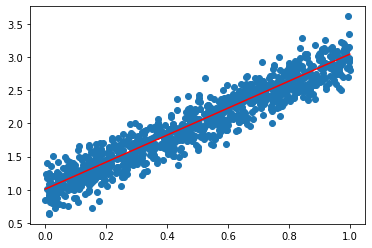

In [31]:
plt.scatter(X_data, y_data)
plt.plot(X_test, y_test, c='red')